Знакомство с проектной работой
Познакомьтесь с проектом, который вам предстоит выполнить после этого курса.
Описание проекта

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
Инструкция по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию
Путь к файлам:
/datasets/calls.csv. Скачать датасет
/datasets/internet.csv. Скачать датасет
/datasets/messages.csv. Скачать датасет
/datasets/tariffs.csv. Скачать датасет
/datasets/users.csv. Скачать датасет

Шаг 2. Подготовьте данные
* Приведите данные к нужным типам;
* Найдите и исправьте ошибки в данных, если они есть.
* Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.




Задача: 

Подготовить данные для дальнейшего анализа. По данным выборки оператора сотовой связи сделать анализ тарифов. Проверить гипотезы, указанные в ТЗ.

Загружаем библиотеки, устанавливаем настройку для таблицы, загружаем файлы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
try:
    df_calls = pd.read_csv(r'C:\Users\Иванов\calls.csv')
except:
    df_calls = pd.read_csv('/datasets/calls.csv')

In [4]:
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Таблица calls (информация о звонках):
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [5]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month

In [8]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype(int)

Пропусков нет.

Меняем формат даты. Выделяем в отдельный столбец месяц, это нужно будет для дальнейшего анализа. 

Округляем длительность звонков в большую сторону (по условиям тарифов), меняем тип данных.

In [9]:
try:
    internet_df = pd.read_csv(r'C:\Users\Иванов\internet.csv',sep=',')
except:
    internet_df = pd.read_csv('/datasets/internet.csv',sep=',')

In [10]:
display(internet_df.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Таблица internet (информация об интернет-сессиях):
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [11]:
internet_df.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [12]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [13]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format = '%Y-%m-%d')
internet_df['month'] = internet_df['session_date'].dt.month

Пропусков нет.

Меняем формат даты. 

Выделяем в отдельный столбец месяц.

In [14]:
try:
    messages_df = pd.read_csv(r'C:\Users\Иванов\messages.csv', sep=',')
except:
    messages_df = pd.read_csv('/datasets/messages.csv', sep=',')

In [15]:
display(messages_df.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Таблица messages (информация о сообщениях):
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [16]:
messages_df.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [17]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [18]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format = '%Y-%m-%d')
messages_df['month'] = messages_df['message_date'].dt.month

Пропусков нет.

Меняем формат даты. 

Выделяем в отдельный столбец месяц.

In [19]:
try:
    tariffs_df = pd.read_csv(r'C:\Users\Иванов\tariffs.csv')
except:
    tariffs_df = pd.read_csv('/datasets/tariffs.csv')

In [20]:
display(tariffs_df.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица tariffs (информация о тарифах):
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [21]:
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Пропусков нет. Тип данных соответствует

In [22]:
try:
    users_df = pd.read_csv(r'C:\Users\Иванов\users.csv')
except:
    users_df = pd.read_csv('/datasets/users.csv')

In [23]:
display(users_df.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Таблица users (информация о пользователях):
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

In [24]:
users_df.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [25]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format = '%Y-%m-%d')

Изменяем формат данных с датой подключения. Дата прекращения пользования тарифом в дальнейшем анализе нам не понадобится. Оставляем пропуски, не меняем.

Посчитайте для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

Описание тарифов

Тариф «Смарт»
* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 3 рубля
* сообщение: 3 рубля
* 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
* минута разговора: 1 рубль
* сообщение: 1 рубль
* 1 Гб интернет-трафика: 150 рублей

Группируем таблицы по:

* количеству сделанных звонков и израсходованных минут разговора по месяцам;
* количеству отправленных сообщений по месяцам;
* объему израсходованного интернет-трафика по месяцам;

Удаляем в них индексы для дальнейшего объединения.

In [27]:
df_calls_pivot = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum']).reset_index()

In [28]:
df_messages_pivot = messages_df.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).reset_index()

In [29]:
internet_df_pivot = internet_df.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=['sum']).reset_index()

Соединяем таблицы.

In [30]:
df_calls_internet = df_calls_pivot.merge(internet_df_pivot, on = ('user_id', 'month'), how = 'outer')

C:\anaconda3\envs\da_practicum_env\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [31]:
df_calls_internet_messages = df_calls_internet.merge(df_messages_pivot, on = ('user_id', 'month'), how = 'outer')

Юпитер ругается, т.к. названия столбцов "двухэтажные". Переименовываем.

In [32]:
df_calls_internet_messages.columns = ['user_id', 'month', 'duration_count', 'duration_time', 'internet', 'sms']

Выбираем из датафрейма только нужные нам столбцы. Переименовываем название столбца для последующего объединения.

In [33]:
users_df_1 = users_df.loc[:, ['user_id','city','tariff']]

In [34]:
users_df_1.columns = ['user_id','city','tariff_name']

Объединяем с остальными датафреймами.

In [35]:
df_work = df_calls_internet_messages.merge(users_df_1, on = 'user_id', how = 'left')

In [36]:
df_work = df_work.merge(tariffs_df, on = 'tariff_name', how = 'left')

In [37]:
display(df_work.head())

,user_id,month,duration_count,duration_time,internet,sms,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,2253.49,22.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,23233.77,60.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,14003.64,75.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,14055.93,81.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,14568.91,57.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [38]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration_count         3174 non-null   float64
 3   duration_time          3174 non-null   float64
 4   internet               3203 non-null   float64
 5   sms                    2717 non-null   float64
 6   city                   3214 non-null   object 
 7   tariff_name            3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

Смотрим на получившейся датафрейм. Есть пустые значения, это произошло из-за того, что клиент мог за отдельно взятый месяц не пользоваться всеми опциями тарифа. Меняем на нуль, меняем тип данных (кроме интернета).

In [39]:
df_work['duration_count'] = df_work['duration_count'].fillna(0).astype(int)

In [40]:
df_work['duration_time'] = df_work['duration_time'].fillna(0).astype(int)

In [41]:
df_work['internet'] = df_work['internet'].fillna(0)

In [42]:
df_work['sms'] = df_work['sms'].fillna(0).astype(int)

Считаем помесячную выручку с каждого пользователя. Пишем функцию, добавляем столбец. По уловиям тарифов общая сумма интернет трафика за месяц округляется в большую сторону. Переводим Мб в Гб округляем в большую сторону.

In [43]:
def func_price (i):
    time_price = 0
    sms_price = 0
    internet_price = 0
    if i['duration_time'] > i['minutes_included']:
        time_price = (i['duration_time'] - i['minutes_included']) * i['rub_per_minute']
    if i['sms'] > i['messages_included']:
        sms_price = (i['sms'] - i['messages_included']) * i['rub_per_message']        
    if i['internet'] > i['mb_per_month_included']:
        internet_price = np.ceil((i['internet'] - i['mb_per_month_included'])/1024) * i['rub_per_gb']
    price = time_price + sms_price + internet_price + i['rub_monthly_fee']
    return price

In [44]:
df_work['price_month'] = df_work.apply(func_price, axis=1)

In [45]:
display(df_work.head())

,user_id,month,duration_count,duration_time,internet,sms,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,price_month
0,1000,5,22,159,2253.49,22,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43,172,23233.77,60,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47,340,14003.64,75,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52,408,14055.93,81,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58,466,14568.91,57,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0


Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

Минуты разговора.

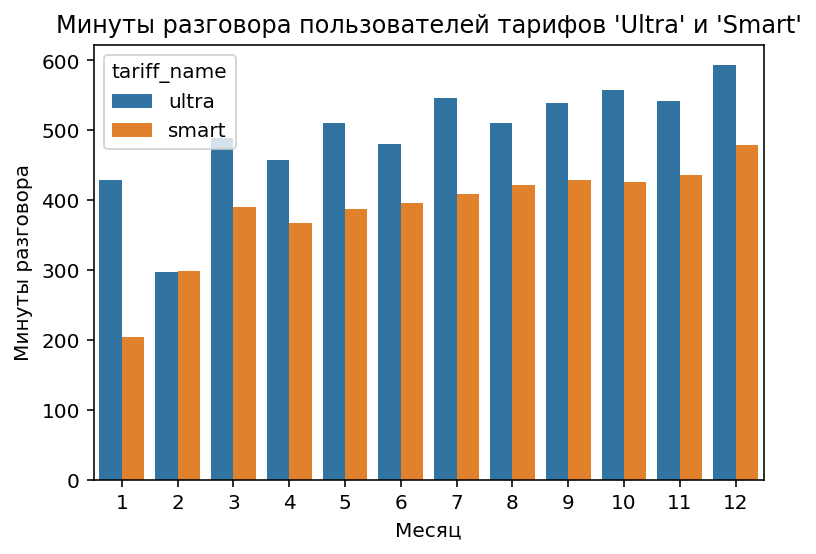

In [46]:
plt.title("Минуты разговора пользователей тарифов 'Ultra' и 'Smart'")
sns.barplot(x='month', y='duration_time', data=df_work, ci=None, hue='tariff_name')
plt.xlabel("Месяц")
plt.ylabel("Минуты разговора")
plt.show()

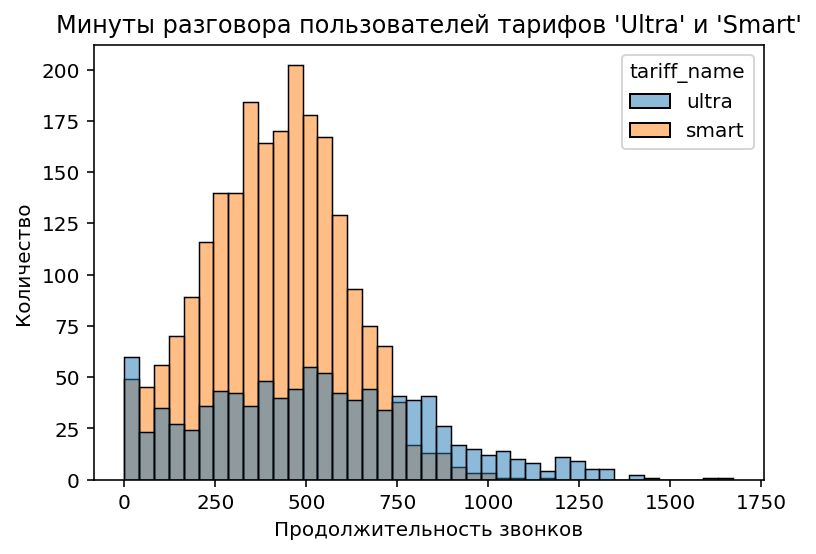

In [47]:
plt.title("Минуты разговора пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='duration_time', data=df_work, hue='tariff_name')
plt.xlabel("Продолжительность звонков")
plt.ylabel("Количество")
plt.show()

In [48]:
df_calls_pivot_work = df_work.pivot_table(index=['tariff_name','month'], values='duration_time', aggfunc=[np.mean, np.var, np.std]).reset_index()

In [49]:
df_calls_pivot_work.columns = ['tariff_name', 'month', 'mean', 'var', 'std']

In [50]:
display(df_calls_pivot_work)

,tariff_name,month,mean,var,std
0,smart,1,203.852941,23787.341355,154.231454
1,smart,2,298.689655,36412.287961,190.820041
2,smart,3,390.051948,36823.155161,191.893604
3,smart,4,367.133929,34778.207127,186.489161
4,smart,5,387.361702,34820.061094,186.601343
5,smart,6,395.640244,30742.918861,175.336587
6,smart,7,408.353234,32250.269602,179.583601
7,smart,8,421.468085,34793.583379,186.530382
8,smart,9,428.611538,33535.342723,183.126576
9,smart,10,426.136054,35392.336375,188.128510


In [51]:
df_work_all = df_work.pivot_table(index=['tariff_name'], values=['duration_time', 'internet', 'sms'], aggfunc=[np.mean, np.var, np.std]).reset_index()
display(df_work_all)

tariff_name          mean                                     var  \
              duration_time      internet        sms  duration_time   
0       smart    417.934948  16208.386990  33.384029   36219.315784   
1       ultra    526.623350  19468.805208  49.363452  100873.633397   

                                       std                           
       internet          sms duration_time      internet        sms  
0  3.446250e+07   796.812958    190.313730   5870.476681  28.227876  
1  1.017510e+08  2285.266143    317.606098  10087.170752  47.804457

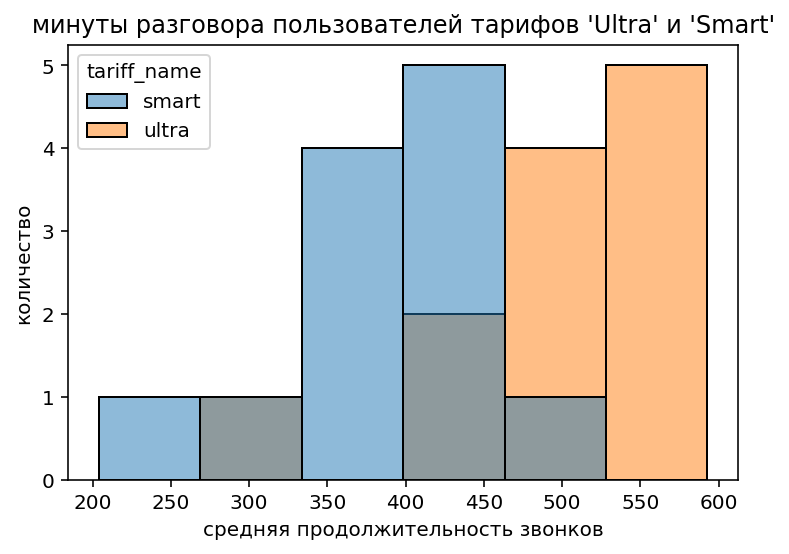

In [52]:
plt.title("минуты разговора пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='mean', data=df_calls_pivot_work, hue='tariff_name')
plt.xlabel("средняя продолжительность звонков")
plt.ylabel("количество")
plt.show()

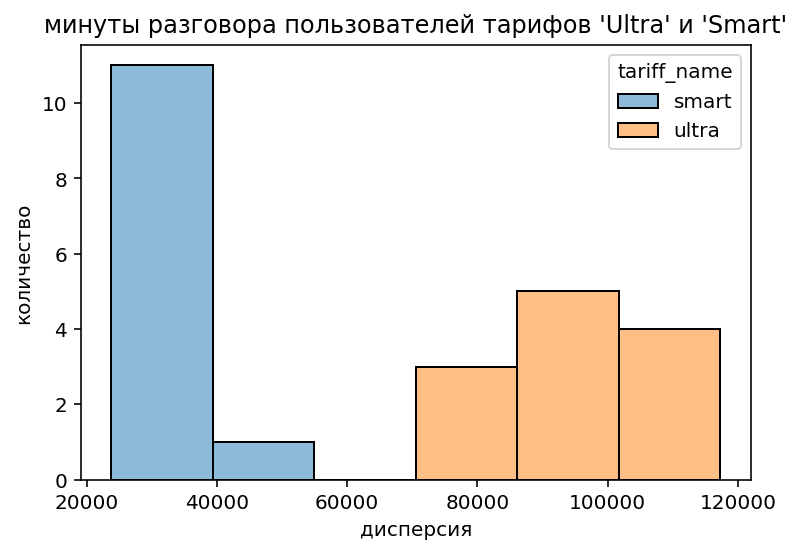

In [53]:
plt.title("минуты разговора пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='var', data=df_calls_pivot_work, hue='tariff_name')
plt.xlabel("дисперсия")
plt.ylabel("количество")
plt.show()

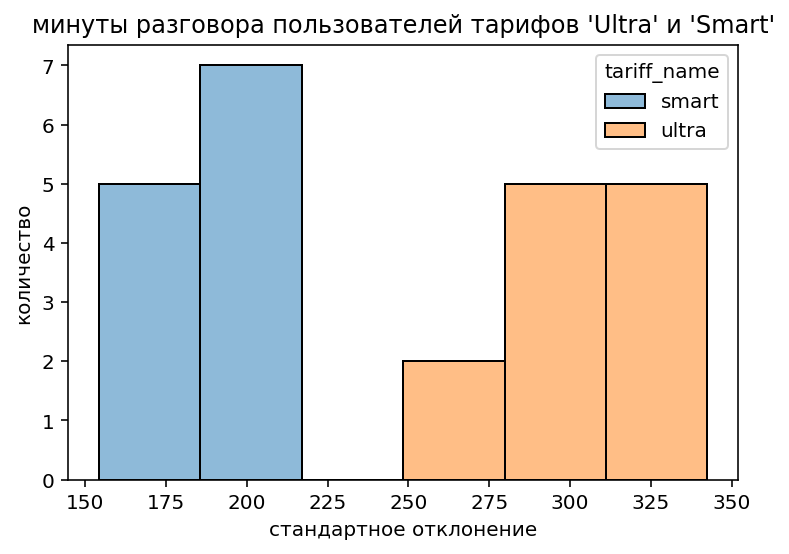

In [54]:
plt.title("минуты разговора пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='std', data=df_calls_pivot_work, hue='tariff_name')
plt.xlabel("стандартное отклонение")
plt.ylabel("количество")
plt.show()

Из графиков видно, что владельцы тарифа "Ultra" разговаривают дольше владельцев тарифа "Smart". Хотя в феврале 2018 года этот показатель почти одинаковый. Также можно сказать что есть и те, кто очень мало использует звонки (или вообще их не использует). Вероятно, это обусловлено тем, что "симки" приобретают для использования в роутере (вероятнее всего для тарифа "Ultra") и для систем основанных на sms-сообщениях (вероятнее всего для тарифа "Smart").

Сообщения.

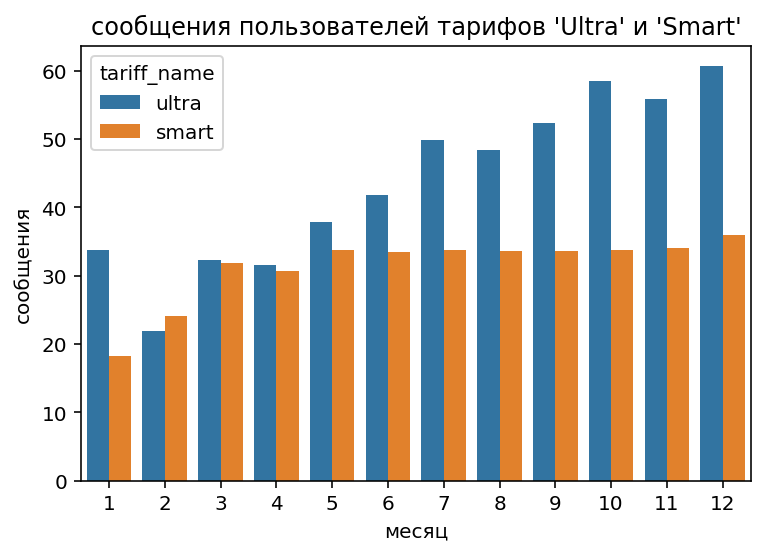

In [55]:
plt.title("сообщения пользователей тарифов 'Ultra' и 'Smart'")
sns.barplot(x='month', y='sms', data=df_work, ci=None, hue='tariff_name')
plt.xlabel("месяц")
plt.ylabel("сообщения")
plt.show()

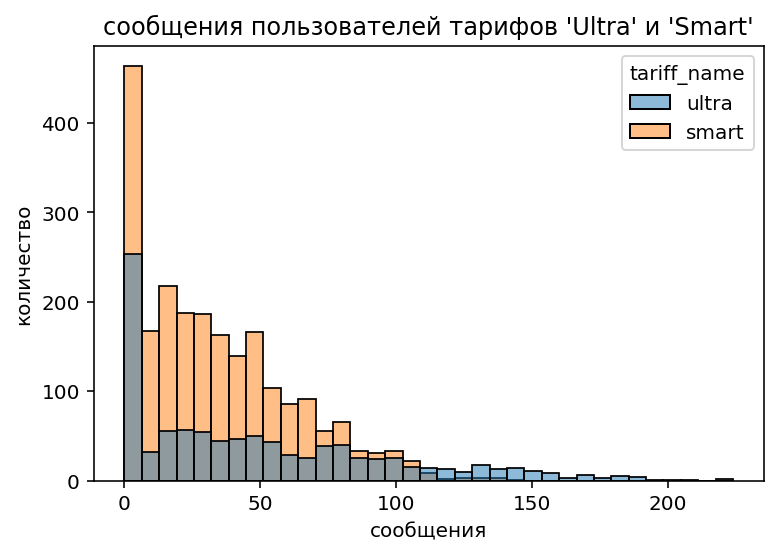

In [56]:
plt.title("сообщения пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='sms', data=df_work, hue='tariff_name')
plt.xlabel("сообщения")
plt.ylabel("количество")
plt.show()

In [57]:
df_sms_pivot_work = df_work.pivot_table(index=['tariff_name','month'], values='sms', aggfunc=[np.mean, np.var, np.std]).reset_index()

In [58]:
df_sms_pivot_work.columns = ['tariff_name', 'month', 'mean', 'var', 'std']

In [59]:
display(df_sms_pivot_work)

,tariff_name,month,mean,var,std
0,smart,1,18.235294,262.367201,16.197753
1,smart,2,24.086207,473.097701,21.750809
2,smart,3,31.857143,718.492481,26.804710
3,smart,4,30.741071,602.139559,24.538532
4,smart,5,33.773050,730.990983,27.036845
5,smart,6,33.402439,806.806374,28.404337
6,smart,7,33.751244,799.887811,28.282288
7,smart,8,33.638298,838.257501,28.952677
8,smart,9,33.638462,790.617820,28.117927
9,smart,10,33.765306,816.111966,28.567673


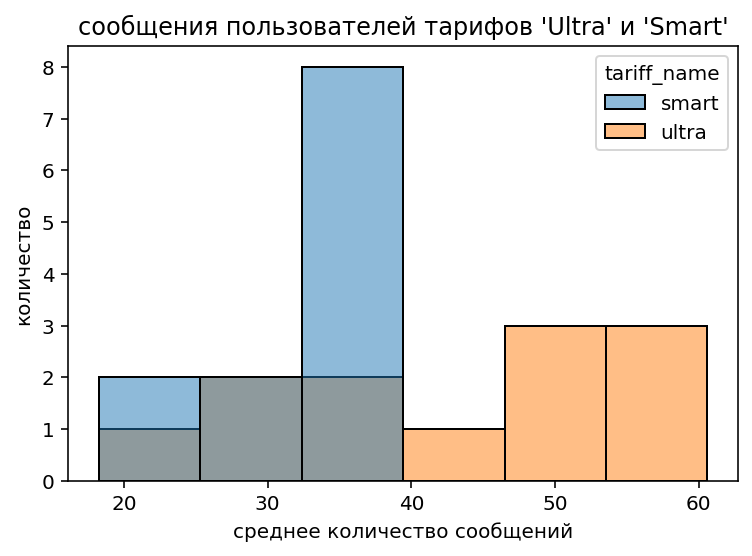

In [60]:
plt.title("сообщения пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='mean', data=df_sms_pivot_work, hue='tariff_name')
plt.xlabel("среднее количество сообщений")
plt.ylabel("количество")
plt.show()

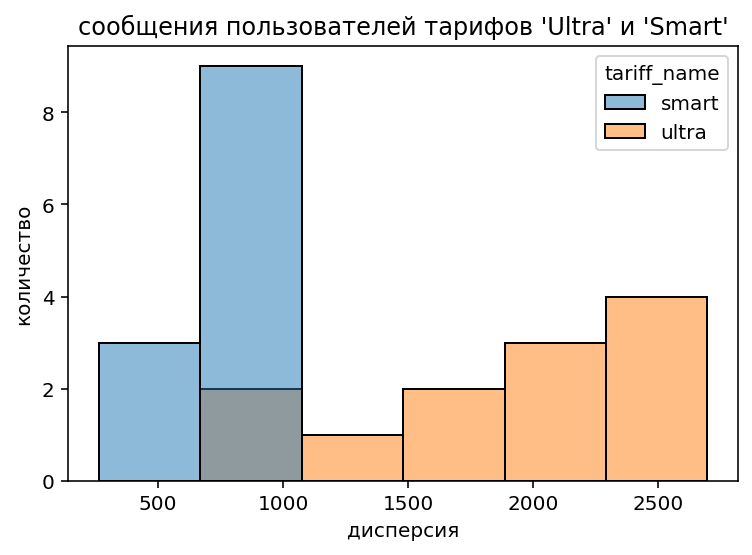

In [61]:
plt.title("сообщения пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='var', data=df_sms_pivot_work, hue='tariff_name')
plt.xlabel("дисперсия")
plt.ylabel("количество")
plt.show()

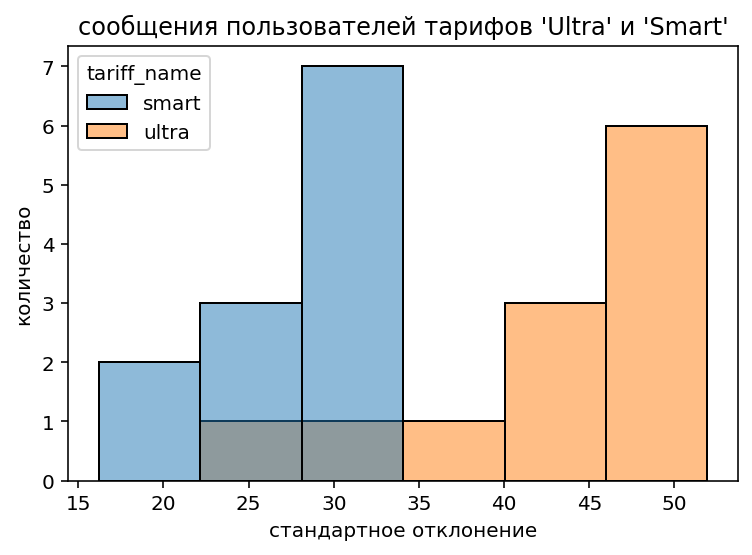

In [62]:
plt.title("сообщения пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='std', data=df_sms_pivot_work, hue='tariff_name')
plt.xlabel("стандартное отклонение")
plt.ylabel("количество")
plt.show()

Ситуация аналогична со звонками. Абоненты тарифа "Ultra" пользуются сообщениями чаще, хотя в марте и апреле показатели почти одинаковые а в феврале ниже чем у абонентов "Smart". Нулевые показатели тоже присутствуют, что вполне объяснимо появлением множества мессенджеров и sms-сообщениями пользуются всё реже. Интересно, что с мая месяца рост отправленных сообщений отмечается только у пользователей "Ultra".

Интернет.

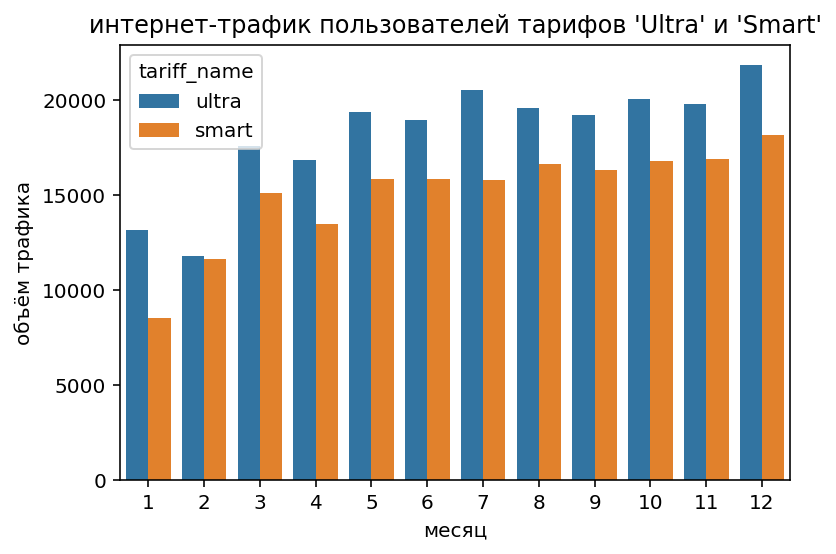

In [63]:
plt.title("интернет-трафик пользователей тарифов 'Ultra' и 'Smart'")
sns.barplot(x='month', y='internet', data=df_work, ci=None, hue='tariff_name')
plt.xlabel("месяц")
plt.ylabel("объём трафика")
plt.show()

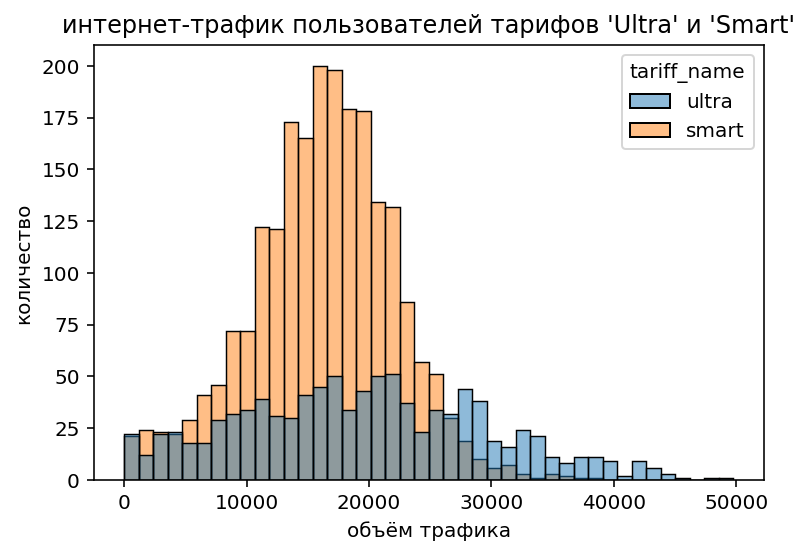

In [64]:
plt.title("интернет-трафик пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='internet', data=df_work, hue='tariff_name')
plt.xlabel("объём трафика")
plt.ylabel("количество")
plt.show()

In [65]:
df_internet_pivot_work = df_work.pivot_table(index=['tariff_name','month'], values='internet', aggfunc=[np.mean, np.var, np.std]).reset_index()

In [66]:
df_internet_pivot_work.columns = ['tariff_name', 'month', 'mean', 'var', 'std']

In [67]:
display(df_internet_pivot_work)

,tariff_name,month,mean,var,std
0,smart,1,8513.717647,4.153391e+07,6444.681014
1,smart,2,11597.054310,3.902943e+07,6247.353833
2,smart,3,15104.159091,3.396835e+07,5828.237537
3,smart,4,13462.180625,3.247004e+07,5698.249092
4,smart,5,15805.184326,3.573925e+07,5978.231725
5,smart,6,15794.647988,3.353748e+07,5791.155586
6,smart,7,15743.150348,3.477643e+07,5897.154446
7,smart,8,16610.720085,3.128723e+07,5593.499133
8,smart,9,16303.578808,2.699962e+07,5196.115749
9,smart,10,16757.122891,3.433239e+07,5859.384492


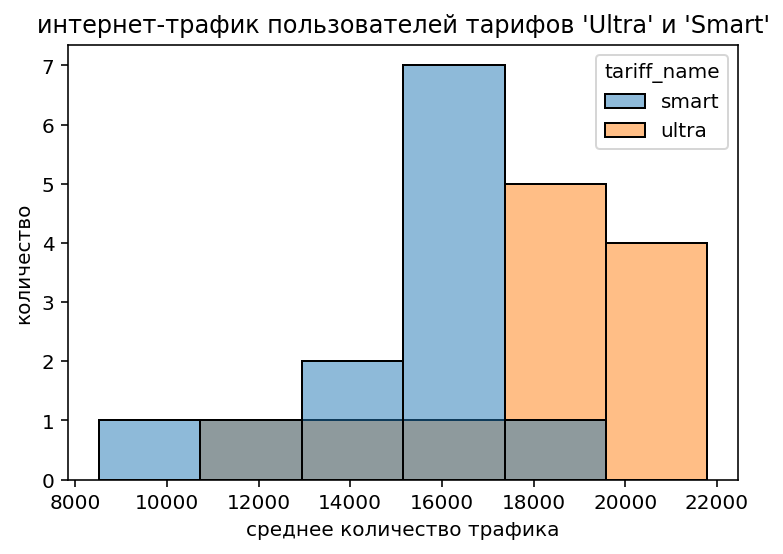

In [68]:
plt.title("интернет-трафик пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='mean', data=df_internet_pivot_work, hue='tariff_name')
plt.xlabel("среднее количество трафика")
plt.ylabel("количество")
plt.show()

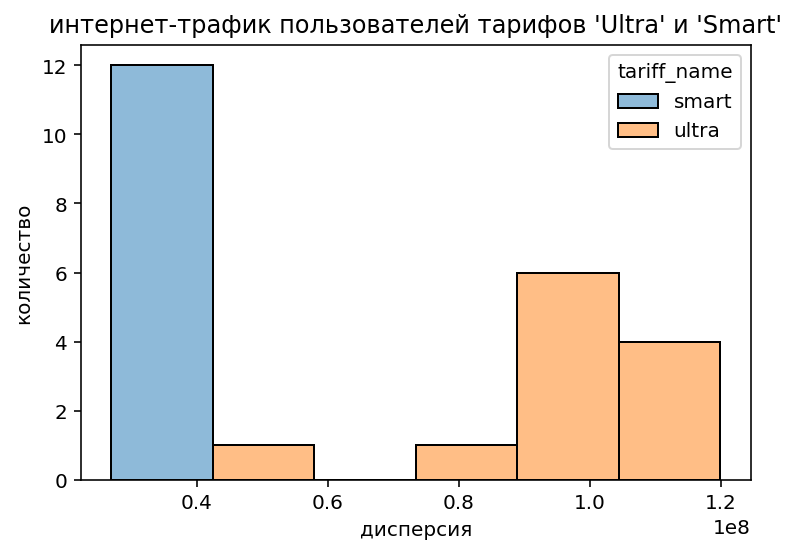

In [69]:
plt.title("интернет-трафик пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='var', data=df_internet_pivot_work, hue='tariff_name')
plt.xlabel("дисперсия")
plt.ylabel("количество")
plt.show()

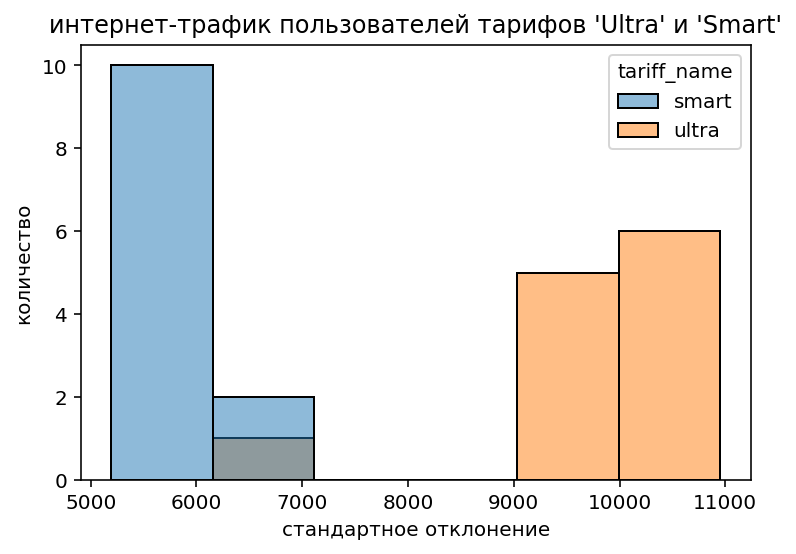

In [70]:
plt.title("интернет-трафик пользователей тарифов 'Ultra' и 'Smart'")
sns.histplot(x='std', data=df_internet_pivot_work, hue='tariff_name')
plt.xlabel("стандартное отклонение")
plt.ylabel("количество")
plt.show()

Похожая ситуация. Владельцы "Ultra" используют больше интернета. Февраль почти одинаково. А вот нулевых показателей почти нет. Интернет нужен почти всем!

Итог:

* владельцы тарифа "Ultra" больше используют услуги сотового оператора
* нулевые показатели в звонках и sms есть у всех тарифных планов, у интернета их гораздо меньше
* в феврале 2018 года владельцы обоих тарифов использовали услуги почти одинаково.
* тенденция на пользование услугами оператора положительная. На протяжении года все показатели растут.

Шаг 4. Проверьте гипотезы
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
* Пороговое значение alpha задайте самостоятельно.

Поясните:
* как вы формулировали нулевую и альтернативную гипотезы;
* какой критерий использовали для проверки гипотез и почему.


Нулевая гипотеза - средняя выручки двух тарифов одинаковы.

Альтернативная - средние выручки двух тарифов различаются.

Гипотеза двусторонняя.

Пороговое значение alpha определяем в 5%. 

In [71]:
groups_smart = df_work.query('tariff_name=="smart"')

In [72]:
groups_ultra = df_work.query('tariff_name=="ultra"')

In [73]:
alpha = .05
results = scipy.stats.ttest_ind(groups_smart['price_month'], groups_ultra['price_month'])
print('p-значение: ', results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


Нулевая гипотеза - средняя выручка пользователей из Москвы и из других регионов одинаковы.

Альтернативная - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Гипотеза двусторонняя. 

Пороговое значение alpha определяем в 5%.

In [74]:
groups_moscow = df_work.query('city == "Москва"')

In [75]:
groups_no_moscow = df_work.query('city != "Москва"')

In [76]:
alpha = .05
results = scipy.stats.ttest_ind(groups_moscow['price_month'], groups_no_moscow['price_month'])
print('p-значение: ', results.pvalue)
if results.pvalue<alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670223
Не получилось отвергнуть нулевую гипотезу


Вывод после проверки гипотез:

* средние выручки двух тарифов различаются.
* средние выручки пользователей из Москвы и из других регионов одинаковы.

Шаг 5. Напишите общий вывод

В ходе исследования установлено следующее:

* владельцы тарифа "Ultra" больше используют услуги сотового оператора, чем владельцы тарифа "Smart".
* средняя выручка компании «Мегалайн» от владельцев тарифа "Ultra" и владельцев тарифа "Smart" различается.
* нулевые показатели в звонках и sms есть у всех тарифных планов, у интернета их гораздо меньше.
* в феврале 2018 года владельцы обоих тарифов использовали услуги почти одинаково.
* средняя выручка пользователей всех тарифов компании «Мегалайн» из Москвы и из других регионов одинаковы.
* тенденция на пользование услугами оператора положительная. На протяжении года все показатели растут.

Компании «Мегалайн» посоветую направить рекламную деятельность на продвижение тарифа "Ultra" как более прибыльного по отношению к тарифу "Smart". Применительно ко всем регионам России, а не только к Москве.